In [1]:
import pandas as pd
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,confusion_matrix,median_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [9]:
print(df['target'].unique())
print(df['restecg'].unique())
print(df['exang'].unique())
print(df['fbs'].unique())
print(df['thal'].unique())

[1 0]
[0 1 2]
[0 1]
[1 0]
[1 2 3 0]


In [10]:
for i in df.columns:
    print(i,df[i].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [11]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

# Continuous Variables (not unique value)

In [12]:
cot_var=df[['age','oldpeak','trestbps','thalach','chol']]
cot_var.head()

,age,oldpeak,trestbps,thalach,chol
0,63,2.3,145,150,233
1,37,3.5,130,187,250
2,41,1.4,130,172,204
3,56,0.8,120,178,236
4,57,0.6,120,163,354


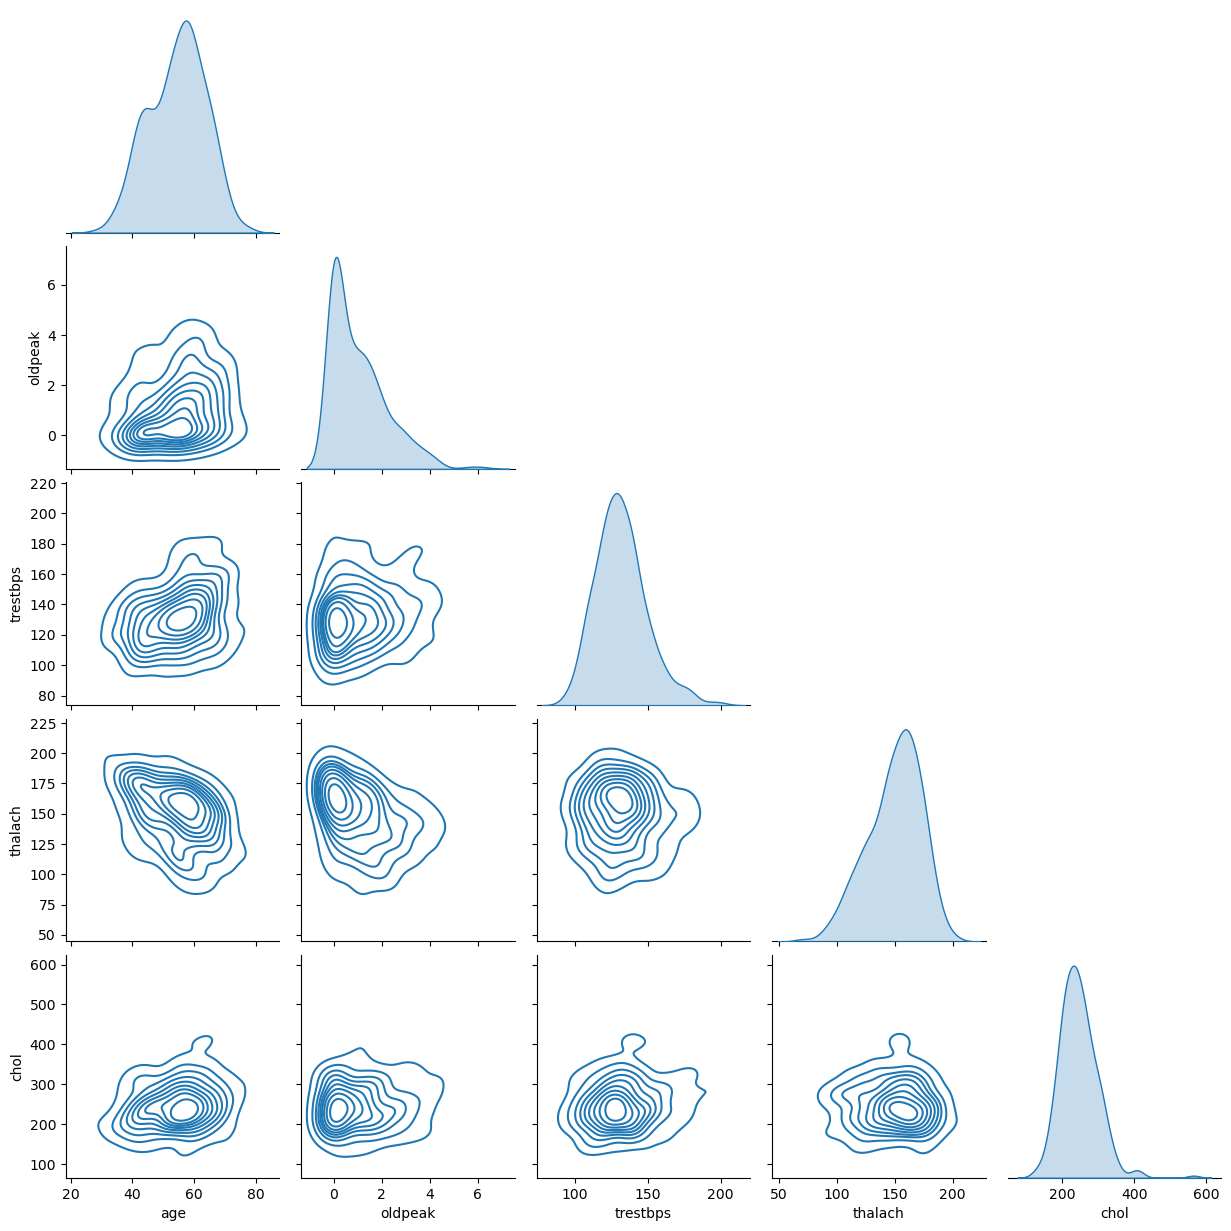

In [13]:
sns.pairplot(cot_var,kind='kde', height = 2.5, corner = True);


In [14]:
df['target'].count()

303

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

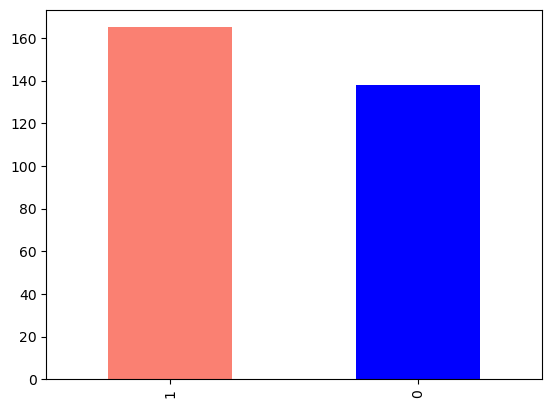

In [16]:
df['target'].value_counts().plot(kind="bar",color=["salmon","blue"]);


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [19]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


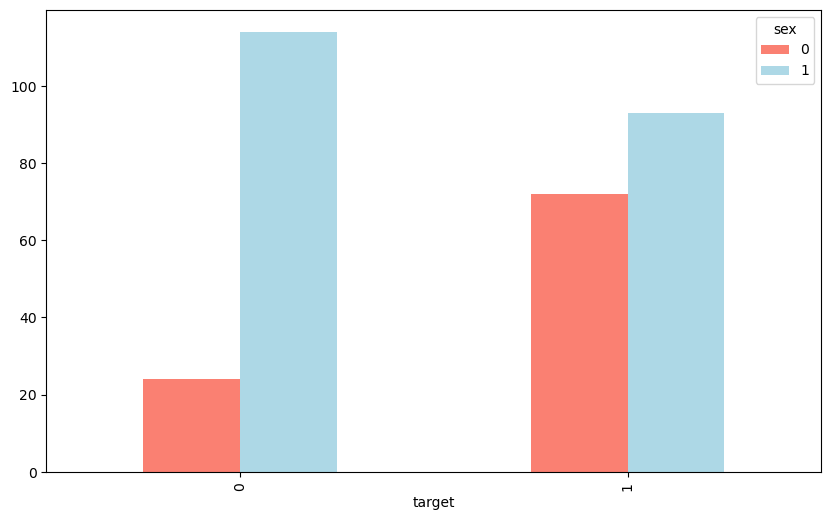

In [21]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

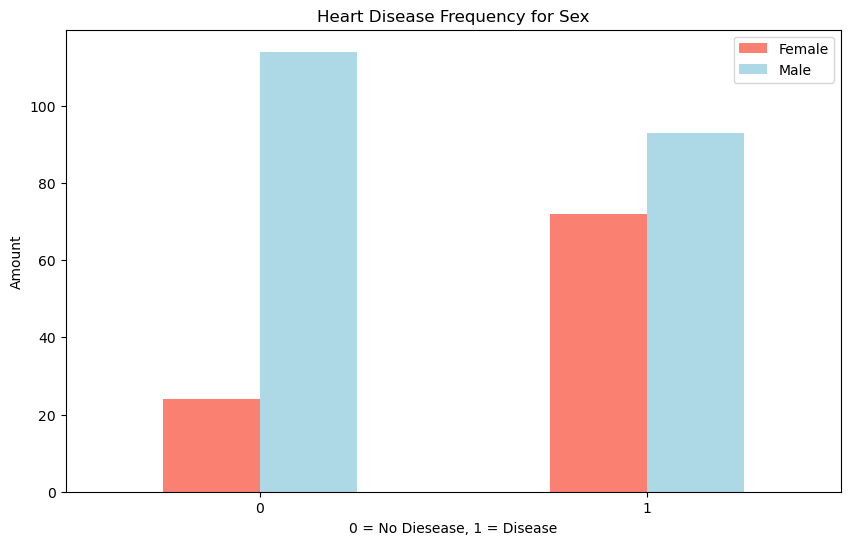

In [22]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);


<AxesSubplot:ylabel='Frequency'>

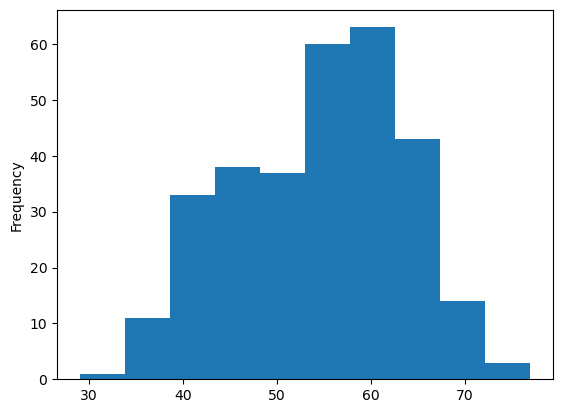

In [23]:
df.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

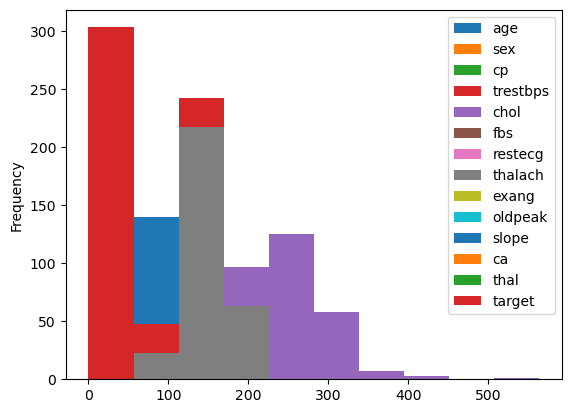

In [24]:
df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

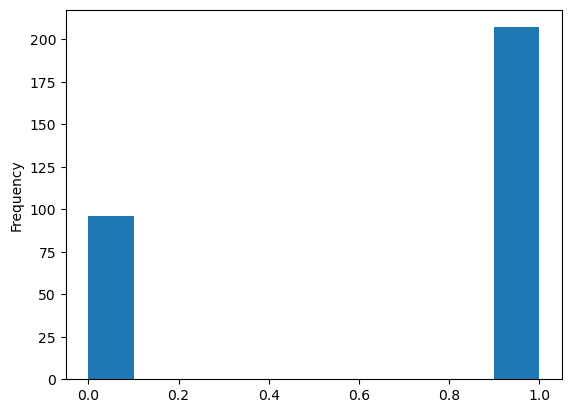

In [25]:
df['sex'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

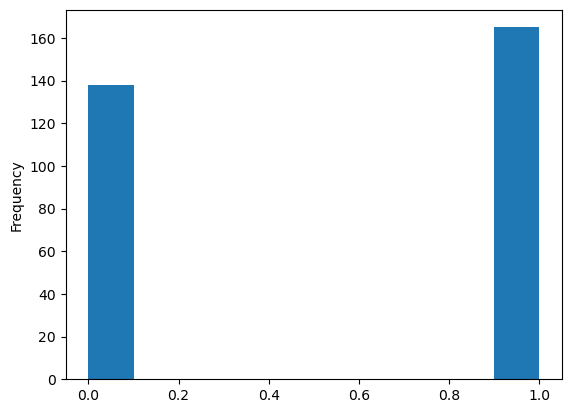

In [26]:
df.target.plot.hist()

In [27]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


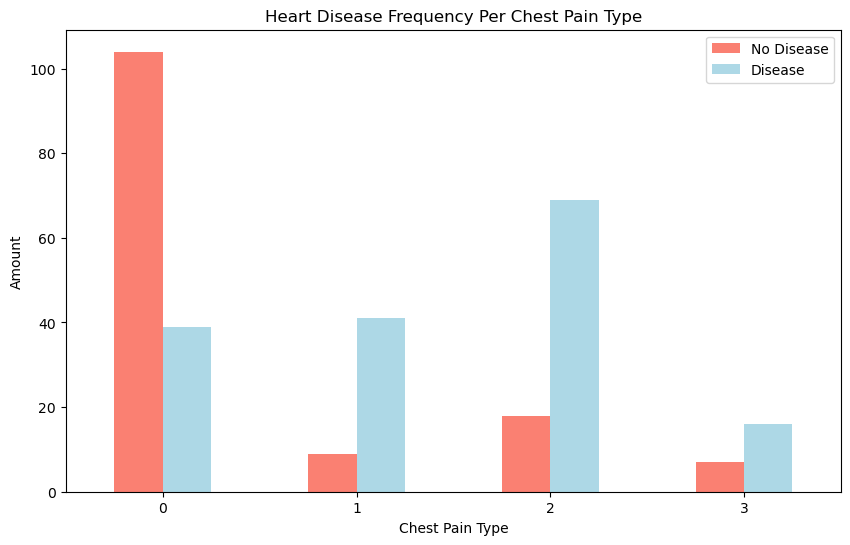

In [28]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

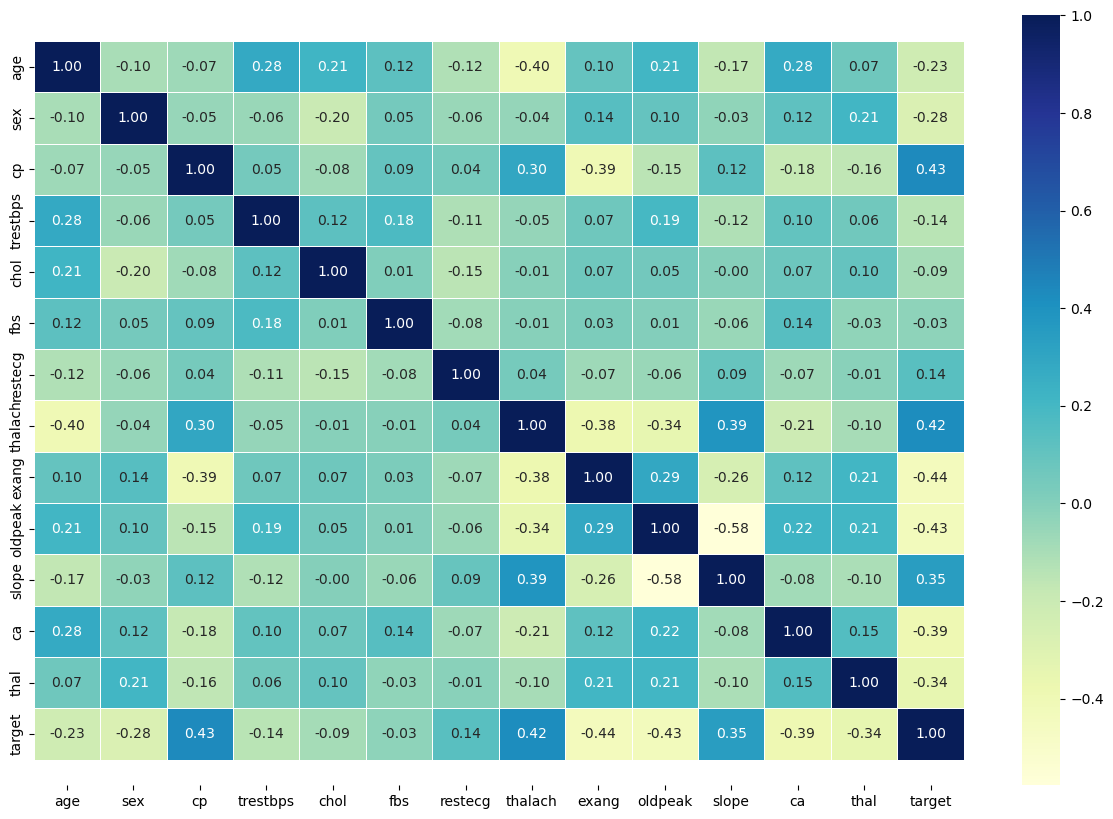

In [30]:
corelation=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corelation,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top- 0.5)


In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
x=df.drop(['target'],axis=1)
y=df['target']

C:\Users\RANJEET\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


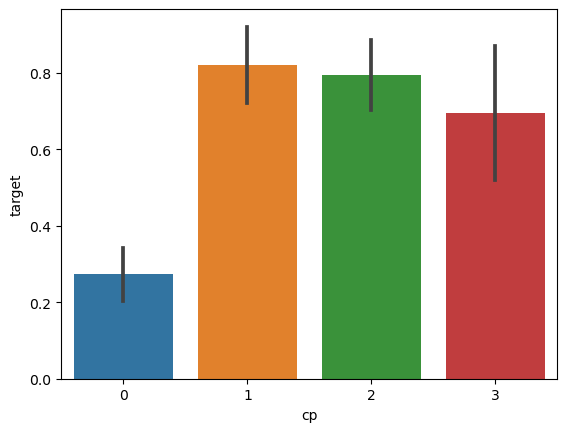

In [33]:
sns.barplot(df['cp'],y);

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [35]:
y_pred.shape

(61,)

In [36]:
clf.score(x_test,y_test)

0.8852459016393442

<AxesSubplot:title={'center':' Number of Patients by Age '}, xlabel='age'>

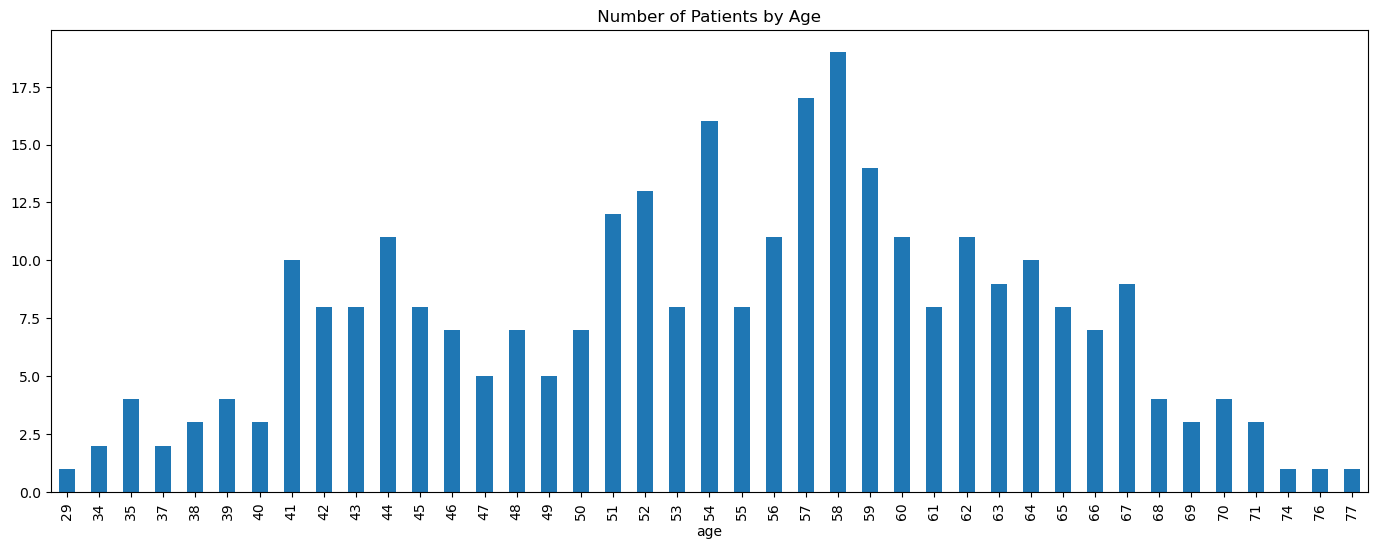

In [37]:
df.groupby('age')["target"].count().plot(kind="bar",figsize=(17,6), title=" Number of Patients by Age ")

# categorail variable 

In [38]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [39]:
cat_var=df[['sex','fbs','exang','target','restecg','slope','cp','thal','ca']]

In [40]:
cat_var

,sex,fbs,exang,target,restecg,slope,cp,thal,ca
0,1,1,0,1,0,0,3,1,0
1,1,0,0,1,1,0,2,2,0
2,0,0,0,1,0,2,1,2,0
3,1,0,0,1,1,2,1,2,0
4,0,0,1,1,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,1,0,3,0
299,1,0,0,0,1,1,3,3,0
300,1,1,0,0,1,1,0,3,2
301,1,0,1,0,1,1,0,3,1


In [41]:
test=cat_var.copy()

In [42]:
test.head()

,sex,fbs,exang,target,restecg,slope,cp,thal,ca
0,1,1,0,1,0,0,3,1,0
1,1,0,0,1,1,0,2,2,0
2,0,0,0,1,0,2,1,2,0
3,1,0,0,1,1,2,1,2,0
4,0,0,1,1,1,2,0,2,0


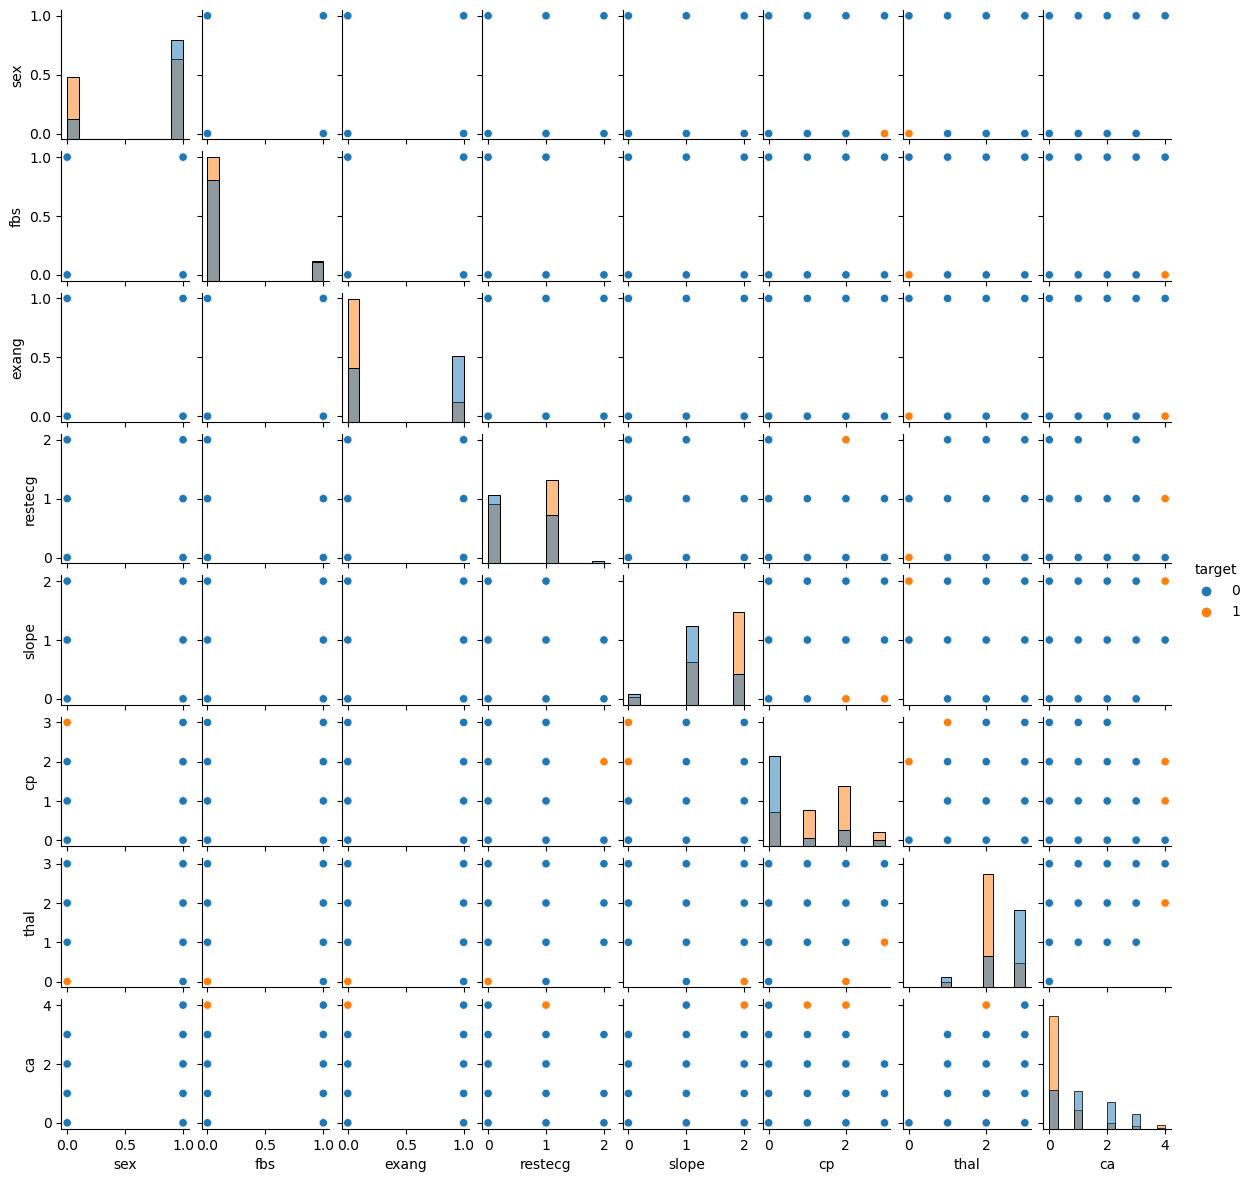

In [43]:
sns.pairplot(test,diag_kind='hist',height=1.5,hue='target')

# Gender of patients

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='target'>

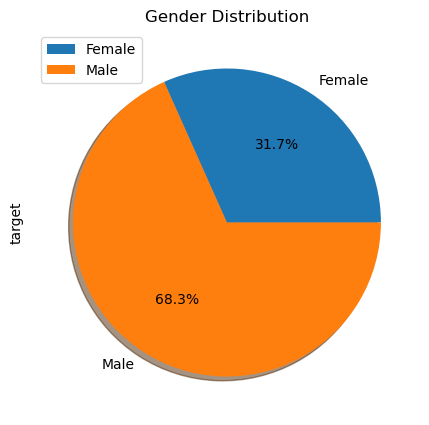

In [45]:

labels=['Female','Male']
df.groupby('sex')['target'].count().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(5,5),
                                        title="Gender Distribution",labels=labels,legend=True)

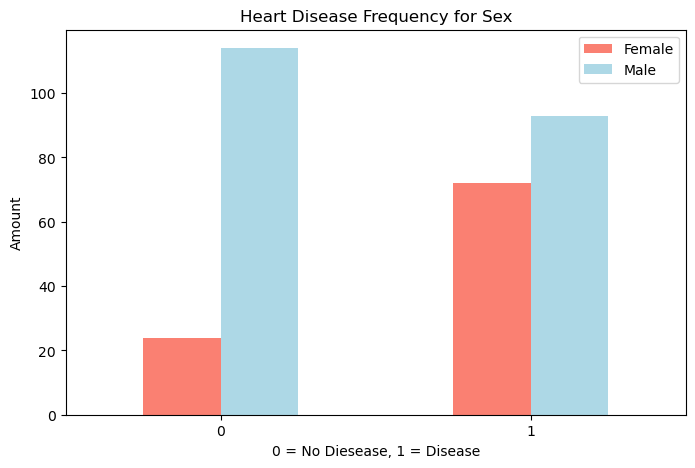

In [46]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(8,5),
                                   color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

<AxesSubplot:title={'center':'Chest pain type Distribution'}, ylabel='target'>

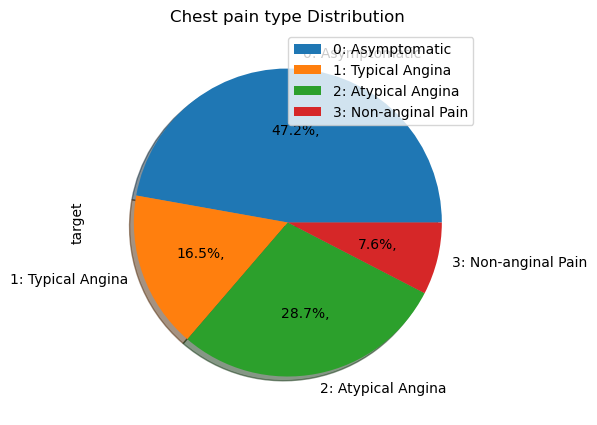

In [47]:
labels=['0: Asymptomatic','1: Typical Angina','2: Atypical Angina','3: Non-anginal Pain']
df.groupby('cp')['target'].count().plot(kind='pie',autopct='%1.1f%%,',shadow=True,figsize=(5,5),
                                        title='Chest pain type Distribution',labels=labels,legend=True)

<AxesSubplot:title={'center':'Target Variable - output'}, ylabel='target'>

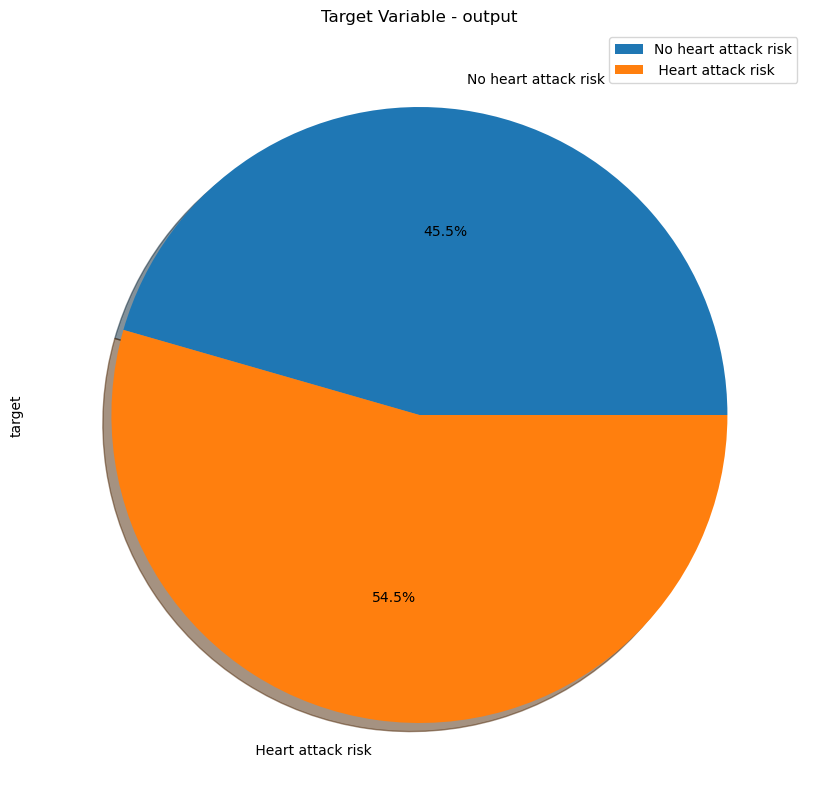

In [48]:
labels = ['No heart attack risk' , ' Heart attack risk']
df.groupby('target')["target"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,
                                                  figsize=(10,10),title="Target Variable - output", 
                                                  labels = labels, legend = True)


In [68]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis=1)
y=df['target']
x_train,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier
# put model in dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest":  RandomForestClassifier()}

In [70]:
# create a function to fitt and score model

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_score={}
    #loop through models
    for name,model in models.items():
    #fit  the model
           model.fit(x_train,y_train)
    # evaluate the model and append its score to model_score
           model_score[name]=model.score(x_test,y_test)
    return model_score

In [71]:
model_score=fit_and_score(models=models,
                         x_train=x_train,
                         x_test=x_test,
                         y_train=y_train,
                         y_test=y_test)
model_score

C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

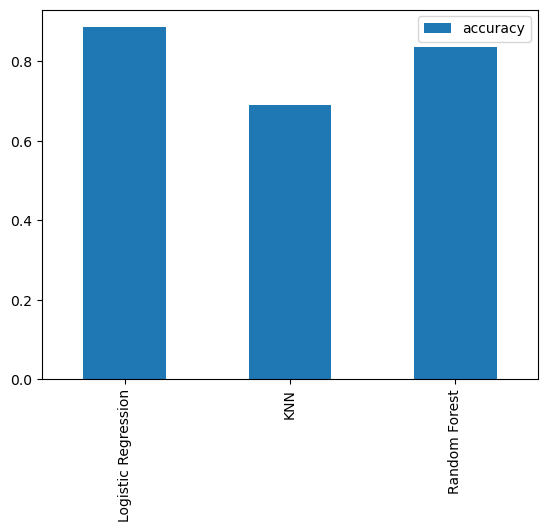

In [72]:
# model comparison
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.T.plot.bar()

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score,roc_auc_score

In [74]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVR = SVC()

In [75]:

li = [LR,DTR,RFR,KNR,MLP,SVR]
d = {}
for i in li:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    print(i,":",accuracy_score(y_test,ypred)*100 , roc_auc_score(y_test,ypred)*100)
    d.update({str(i):i.score(x_test,y_test)*100})

C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 88.52459016393442 88.41594827586206
DecisionTreeClassifier() : 85.24590163934425 85.61422413793103
RandomForestClassifier() : 85.24590163934425 85.12931034482759
KNeighborsClassifier() : 68.85245901639344 68.53448275862068


C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\RANJEET\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

MLPClassifier() : 85.24590163934425 85.29094827586206
SVC() : 70.49180327868852 69.61206896551724


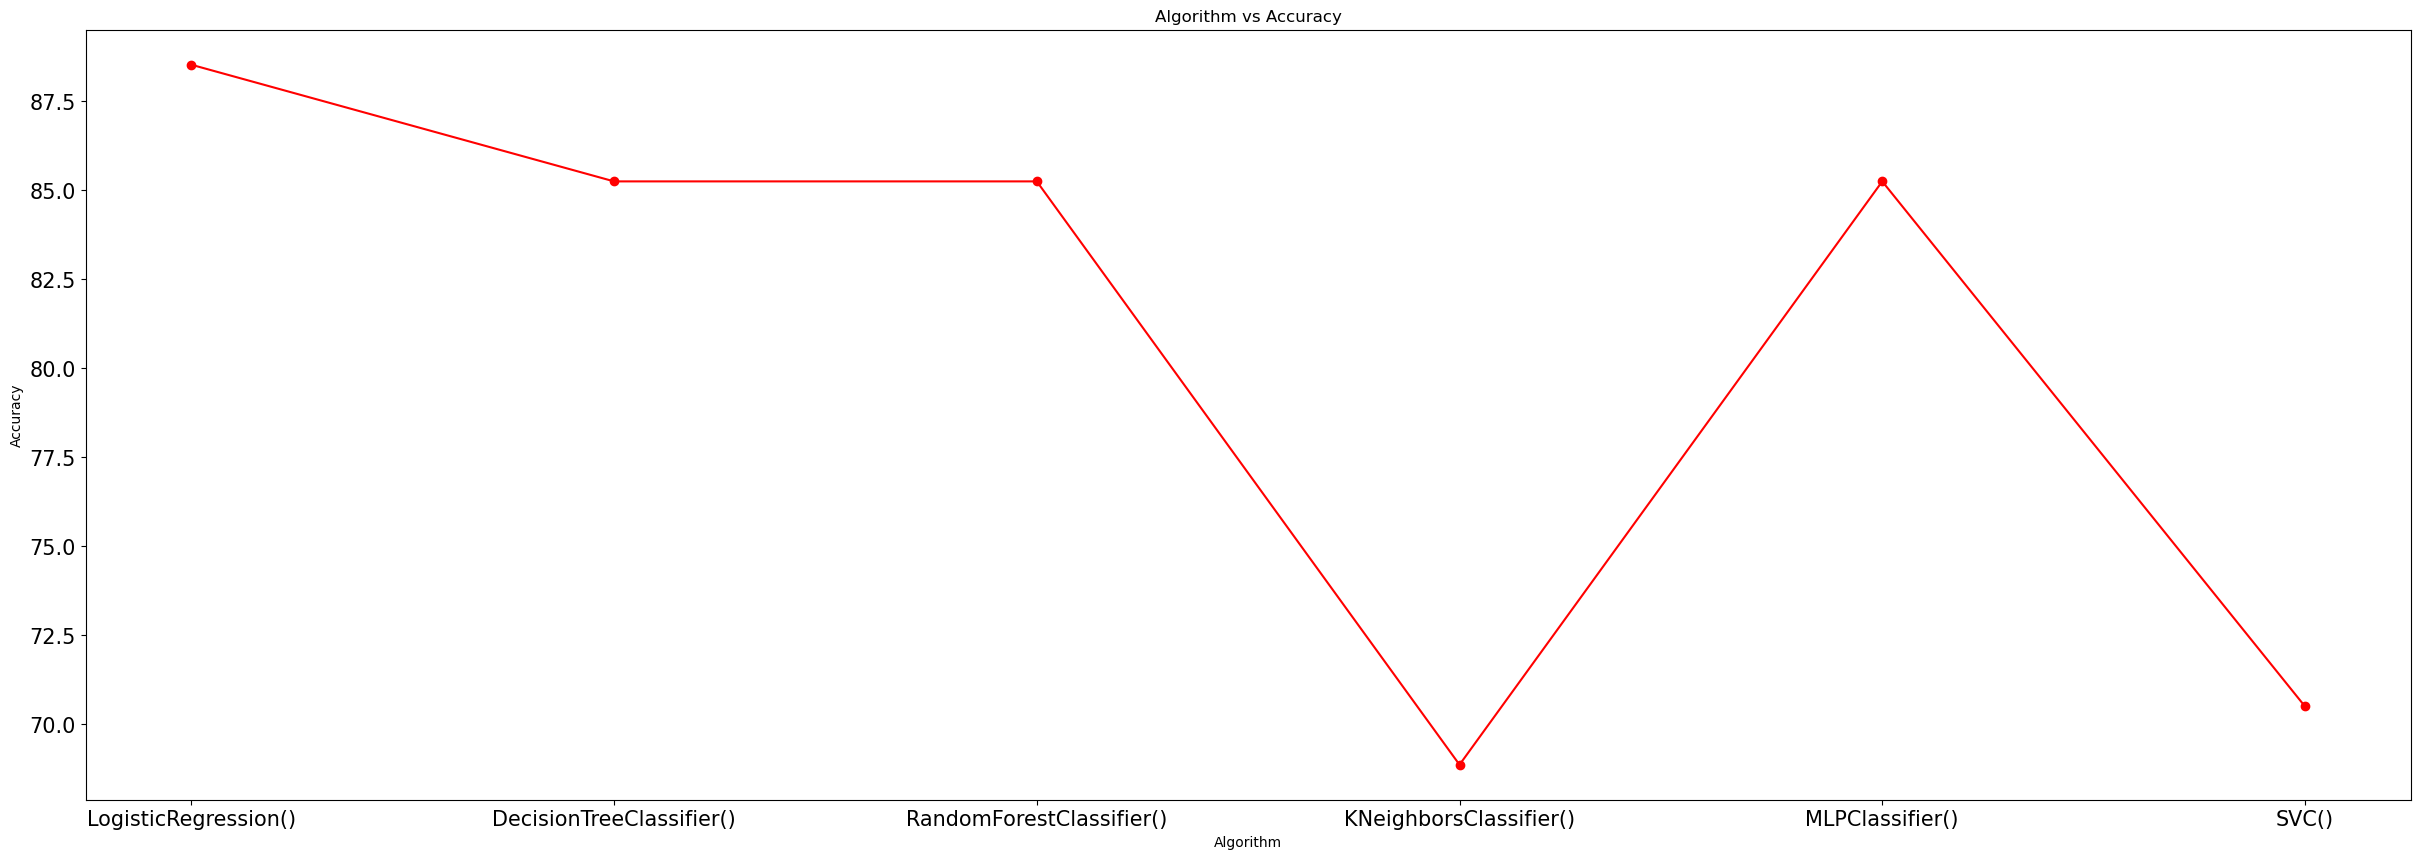

In [76]:
fig1, ax1 = plt.subplots(figsize = (30,10))


plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
ax1.tick_params(labelsize = 15)

plt.show()